# EDA
De acuerdo al ETL realizado previamente, el *objetivo general* de este proyecto se orienta a **la expansión y mejora de la cobertura de red  en Argentina**.
Por lo tanto, el énfasis está en el *alcance* y la *calidad* de la red.
Los objetivos específicos se desarrollarán conforme se vaya realizando el análisis exploratorio de datos.

Importo librerias

In [2]:
import pandas as pd
import numpy as np
#import  requests
import io
from matplotlib import pyplot as plt
import seaborn as sns

Creo los dataframes

In [10]:
df_velocidad_prov = pd.read_csv('data\\velocidad_provincias.csv')
df_accesos_prov = pd.read_csv('data\provincias_acceso.csv')
df_accesos_nacional = pd.read_csv('data\\nacional_acceso.csv')
df_ingresos = pd.read_csv('data\ingresos_dolar.csv')

## DF *internet_rangos_vel_prov*

In [13]:
pd.set_option('display.float_format', '{:.3f}'.format)

In [ ]:
df_velocidad_prov

In [11]:
df_velocidad_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     960 non-null    int64  
 1   Trimestre               960 non-null    int64  
 2   Provincia               960 non-null    object 
 3   512kbps                 960 non-null    float64
 4   512kbps-1mbps           960 non-null    float64
 5   1mbps-6mbps             960 non-null    float64
 6   6mbps-10mbps            960 non-null    float64
 7   10mbps-20mbps           960 non-null    float64
 8   20mbps-30mbps           960 non-null    float64
 9   30mbps                  960 non-null    float64
 10  OTROS                   960 non-null    float64
 11  Total                   960 non-null    float64
 12  Mbps (Media de bajada)  960 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 97.6+ KB


In [14]:
df_velocidad_prov.describe()

,Año,Trimestre,512kbps,512kbps-1mbps,1mbps-6mbps,6mbps-10mbps,10mbps-20mbps,20mbps-30mbps,30mbps,OTROS,Total,Mbps (Media de bajada)
count,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000
mean,2018.500,2.500,1986.276,9291.107,137188.509,38112.431,37303.289,20197.091,109885.055,6043.608,360007.367,21.616
std,2.874,1.119,12889.165,21018.938,328174.836,64565.359,89536.515,70534.758,434785.786,14503.711,774085.159,29.340
min,2014.000,1.000,6.000,0.000,1483.000,0.000,0.000,0.000,0.000,-1945.000,12406.000,2.574
25%,2016.000,1.750,40.750,347.250,24511.500,3581.000,2127.500,36.750,10.750,0.000,58824.000,4.685
50%,2018.500,2.500,107.000,2263.500,44254.000,12913.500,10082.000,1391.500,2418.500,58.000,109705.000,8.886
75%,2021.000,3.250,468.000,7227.500,84395.000,40126.000,26436.000,9858.750,35332.250,6485.250,188079.250,25.682
max,2023.000,4.000,238920.000,171244.480,2299705.320,403575.000,886678.000,949093.000,4042646.000,122762.000,5011620.000,234.440


El DataFrame muestra la cantidad de conexiones por categoría de velocidad de internet en diversas provincias de Argentina a lo largo de los años y trimestres. 

La mayor cantidad promedio de conexiones se ubica en el rango de velocidad *+ 1 Mbps - 6 Mbps*, y la menor en el rango de *Hasta 512 kbps*.

Se puede identificar las provincias con mayores accesos a los rangos de velocidades más rápidas.

Corrijo errores negativos de la columna Otros

In [19]:
df_velocidad_prov['OTROS'] = df_velocidad_prov['OTROS'].replace(-1945.000,1945.000)
df_velocidad_prov['OTROS'] = df_velocidad_prov['OTROS'].replace(-1,1000)

In [21]:
df_velocidad_prov.describe()

,Año,Trimestre,512kbps,512kbps-1mbps,1mbps-6mbps,6mbps-10mbps,10mbps-20mbps,20mbps-30mbps,30mbps,OTROS,Total,Mbps (Media de bajada)
count,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000
mean,2018.500,2.500,1986.276,9291.107,137188.509,38112.431,37303.289,20197.091,109885.055,6048.703,360007.367,21.616
std,2.874,1.119,12889.165,21018.938,328174.836,64565.359,89536.515,70534.758,434785.786,14501.621,774085.159,29.340
min,2014.000,1.000,6.000,0.000,1483.000,0.000,0.000,0.000,0.000,0.000,12406.000,2.574
25%,2016.000,1.750,40.750,347.250,24511.500,3581.000,2127.500,36.750,10.750,0.000,58824.000,4.685
50%,2018.500,2.500,107.000,2263.500,44254.000,12913.500,10082.000,1391.500,2418.500,84.500,109705.000,8.886
75%,2021.000,3.250,468.000,7227.500,84395.000,40126.000,26436.000,9858.750,35332.250,6485.250,188079.250,25.682
max,2023.000,4.000,238920.000,171244.480,2299705.320,403575.000,886678.000,949093.000,4042646.000,122762.000,5011620.000,234.440


Analizamos los datos outliers o registros atipicos de la columna Mbps (Media de bajada) para reconocer que provincias poseen mayores velocidades. Para eso busco Outliers

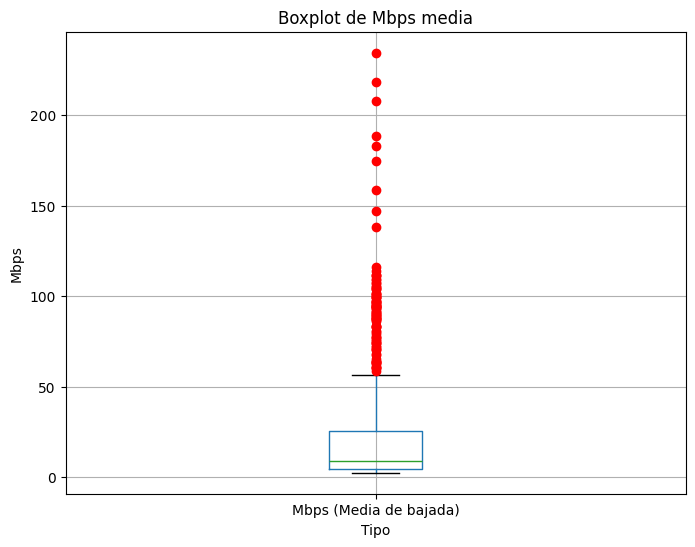

In [25]:
plt.figure(figsize=(8,6))
df_velocidad_prov.boxplot(column=['Mbps (Media de bajada)'], sym='ro')
plt.title('Boxplot de Mbps media')
plt.xlabel('Tipo')
plt.ylabel('Mbps')

plt.show()

Existen muchos outliers, estos se revisaran a continuación

In [26]:
data = df_velocidad_prov[['Mbps (Media de bajada)']]

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)

registros_con_outliers = df_velocidad_prov[outliers]
registros_con_outliers

,Año,Trimestre,Provincia,512kbps,512kbps-1mbps,1mbps-6mbps,6mbps-10mbps,10mbps-20mbps,20mbps-30mbps,30mbps,OTROS,Total,Mbps (Media de bajada)
0,2023,4,Buenos Aires,26909.000,23962.000,228393.000,239339.000,246144.000,110876.000,4042646.000,93351.000,5011620.000,158.490
1,2023,4,Capital Federal,516.000,4544.000,26409.000,48083.000,33925.000,5829.000,1355061.000,0.000,1474367.000,234.440
2,2023,4,Catamarca,71.000,209.000,3065.000,3734.000,4423.000,1827.000,61181.000,77.000,74587.000,89.400
3,2023,4,Chaco,236.000,477.000,14811.000,10361.000,6247.000,5729.000,105485.000,4040.000,147386.000,107.140
5,2023,4,Córdoba,99.000,8404.000,117068.000,91169.000,51126.000,26948.000,767427.000,17061.000,1079302.000,114.030
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,2021,1,Capital Federal,135.000,244.000,159662.000,76753.000,56457.000,83255.000,1003041.000,126.000,1379673.000,68.290
289,2020,4,Capital Federal,135.000,244.000,160210.000,78123.000,60208.000,80269.000,1000073.000,268.000,1379530.000,67.325
313,2020,3,Capital Federal,264.000,312.000,162222.000,85083.000,68753.000,78028.000,977766.000,247.000,1372675.000,63.809
337,2020,2,Capital Federal,264.000,312.000,166474.000,94585.000,79858.000,80160.000,935481.000,687.000,1357821.000,60.484


Quiero ver que valores se repiten mas

In [27]:
conteo = registros_con_outliers['Provincia'].value_counts()
conteo

Provincia
Capital Federal    16
Buenos Aires        9
Catamarca           6
Chaco               5
Córdoba             5
Corrientes          5
Entre Ríos          5
Formosa             5
La Rioja            5
Misiones            5
Neuquén             5
Río Negro           5
Salta               5
Santa Fe            5
Tucumán             5
San Luis            3
Name: count, dtype: int64

Puedo ver que los valores que mas se repiten son Capital Federal 16, Buenos Aires 9, Catamarca  6

## **df_accesos_prov**

In [28]:
df_accesos_prov

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Banda ancha fija,Dial up,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,2023,4,Buenos Aires,223391.000,2797700.000,1784593.000,137993.000,67943.000,5005720,5900.000,80.960,27.680
1,2023,4,Capital Federal,58700.000,1198835.000,182520.000,4492.000,29820.000,1472317,2050.000,117.020,47.800
2,2023,4,Catamarca,6669.000,11016.000,55437.000,1384.000,81.000,74586,1.000,68.630,17.460
3,2023,4,Chaco,14000.000,60277.000,62301.000,8404.000,2404.000,147381,5.000,44.350,11.850
4,2023,4,Chubut,26306.000,77217.000,26174.000,30543.000,9930.000,169313,857.000,84.960,26.040
...,...,...,...,...,...,...,...,...,...,...,...,...
955,2014,1,Santa Cruz,18927.000,100.000,381.000,4092.000,3264.000,26304,460.000,28.939,8.677
956,2014,1,Santa Fe,322662.000,174296.000,3059.000,5951.000,644.000,506000,612.000,47.848,15.078
957,2014,1,Santiago Del Estero,32567.000,3598.000,19.000,915.000,34.000,37124,9.000,16.310,4.059
958,2014,1,Tierra Del Fuego,21618.000,2837.000,648.000,1.000,2934.000,27272,766.000,63.966,19.105


In [29]:
df_accesos_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           960 non-null    int64  
 1   Trimestre                     960 non-null    int64  
 2   Provincia                     960 non-null    object 
 3   ADSL                          960 non-null    float64
 4   Cablemodem                    960 non-null    float64
 5   Fibra óptica                  960 non-null    float64
 6   Wireless                      960 non-null    float64
 7   Otros                         960 non-null    float64
 8   Banda ancha fija              960 non-null    int64  
 9   Dial up                       960 non-null    float64
 10  Accesos por cada 100 hogares  960 non-null    float64
 11  Accesos por cada 100 hab      960 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 90.1+ KB


In [30]:
df_accesos_prov.describe()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Banda ancha fija,Dial up,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000,960.000
mean,2018.500,2.500,117100.738,181634.991,44282.124,12071.288,6451.997,360625.509,915.627,51.662,15.394
std,2.874,1.119,241102.558,446105.747,168154.555,20544.308,11192.518,776137.445,2309.443,23.898,9.169
min,2014.000,1.000,3296.000,0.000,0.000,0.000,2.000,12193.000,0.000,9.347,2.685
25%,2016.000,1.750,21230.250,10544.500,347.000,676.000,330.000,58923.250,5.000,32.857,8.764
50%,2018.500,2.500,45475.500,39670.000,2541.000,4947.000,1881.000,110473.500,137.000,48.817,13.417
75%,2021.000,3.250,91905.000,75493.250,23476.750,13694.250,7278.750,188350.250,618.250,65.117,19.658
max,2023.000,4.000,1586343.000,2797700.000,1784593.000,138405.000,73415.000,5005720.000,15229.000,124.061,52.237


En este dataframe se muestra la cantidad de conexiones a internet por tecnología y Banda Ancha / Dial up en las diferentes provincias de Argentina a lo largo de los años y trimestres.


In [ ]:
col_merge= ["Año", "Trimestre", "Provincia"]

KPI

Segun lo observado a lo alrgo de EDA, he podido notar ciertas tendencias, por lo que opte en trabajar sobre 3 KPIs: los cuales son

1 - Aumento del ingreso de % de la tecnologia          en la provincia       comparado con el ultimo trimestre


2- Crecimiento del % de la tecnologia wireless( ---)    a nivel trimestral por provincia


3 -  Aumento de un 1,5% en el acceso al serviicio internet para el nproximo trimestre cada 100 hogares o cada 100 habitantes

In [17]:
df_penetracion = pd.read_csv('data/penetracion_provincias.csv')

In [18]:
df_penetracion

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,2023,4,Buenos Aires,80.960000,27.680000
1,2023,4,Capital Federal,117.020000,47.800000
2,2023,4,Catamarca,68.630000,17.460000
3,2023,4,Chaco,44.350000,11.850000
4,2023,4,Chubut,84.960000,26.040000
...,...,...,...,...,...
955,2014,1,Santa Cruz,28.939093,8.677327
956,2014,1,Santa Fe,47.847663,15.077801
957,2014,1,Santiago Del Estero,16.309924,4.058899
958,2014,1,Tierra Del Fuego,63.965926,19.104921


In [19]:
df_db_provincia = pd.read_csv('data\dialBAF_provincias.csv')

In [20]:
df_db_provincia

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2023,4,Buenos Aires,5005720,5900.0,5011620
1,2023,4,Capital Federal,1472317,2050.0,1474367
2,2023,4,Catamarca,74586,1.0,74587
3,2023,4,Chaco,147381,5.0,147386
4,2023,4,Chubut,169313,857.0,170170
...,...,...,...,...,...,...
955,2014,1,Santa Cruz,26304,460.0,26764
956,2014,1,Santa Fe,506000,612.0,506612
957,2014,1,Santiago Del Estero,37124,9.0,37133
958,2014,1,Tierra Del Fuego,27272,766.0,28038


Hago un merge

In [21]:
#df_porcentajes = pd.merge(df_db_provincia,df_db_provincia, on=['Año', 'Trimestre', 'Provincia'])

CREO EL KPI

In [22]:
df_crecimiento = df_penetracion.copy()
df_crecimiento

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,2023,4,Buenos Aires,80.960000,27.680000
1,2023,4,Capital Federal,117.020000,47.800000
2,2023,4,Catamarca,68.630000,17.460000
3,2023,4,Chaco,44.350000,11.850000
4,2023,4,Chubut,84.960000,26.040000
...,...,...,...,...,...
955,2014,1,Santa Cruz,28.939093,8.677327
956,2014,1,Santa Fe,47.847663,15.077801
957,2014,1,Santiago Del Estero,16.309924,4.058899
958,2014,1,Tierra Del Fuego,63.965926,19.104921


In [23]:
def get_trimestre_abs(trimestre,anio):
  return trimestre+4*(int(anio)-df_crecimiento["Año"].min())

df_crecimiento["TrimestreCount"] = df_crecimiento.apply(lambda r:get_trimestre_abs(r["Trimestre"],r["Año"]),axis=1)
df_crecimiento

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab,TrimestreCount
0,2023,4,Buenos Aires,80.960000,27.680000,40
1,2023,4,Capital Federal,117.020000,47.800000,40
2,2023,4,Catamarca,68.630000,17.460000,40
3,2023,4,Chaco,44.350000,11.850000,40
4,2023,4,Chubut,84.960000,26.040000,40
...,...,...,...,...,...,...
955,2014,1,Santa Cruz,28.939093,8.677327,1
956,2014,1,Santa Fe,47.847663,15.077801,1
957,2014,1,Santiago Del Estero,16.309924,4.058899,1
958,2014,1,Tierra Del Fuego,63.965926,19.104921,1


In [24]:
df_crecimiento["Trimestre"] = df_crecimiento["Trimestre"].str.strip()
df_crecimiento["Trimestre"] = df_crecimiento["Trimestre"].str.replace("*","")
df_crecimiento["Trimestre"] = pd.to_numeric(df_crecimiento["Trimestre"])
df_crecimiento

AttributeError: Can only use .str accessor with string values!

In [ ]:
def get_trimestre_abs(trimestre,anio):
  return trimestre+4*(int(anio)-df_crecimiento["Año"].min())

df_crecimiento["TrimestreCount"] = df_crecimiento.apply(lambda r:get_trimestre_abs(r["Trimestre"],r["Año"]),axis=1)
df_crecimiento

In [ ]:

df_crecimiento["kpi"] = df_crecimiento.sort_values("TrimestreCount").groupby("Provincia")["Accesos por cada 100 hogares"].transform("diff")
df_crecimiento["kpi"] = df_crecimiento["kpi"].replace(np.nan,0)
df_crecimiento["kpi"] = df_crecimiento["kpi"] / df_crecimiento["Accesos por cada 100 hogares"].apply(lambda v:max(v,1))

df_crecimiento

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab,TrimestreAbs,kpi
0,2023,4,Buenos Aires,80.960000,27.680000,40,0.003953
1,2023,4,Capital Federal,117.020000,47.800000,40,0.005298
2,2023,4,Catamarca,68.630000,17.460000,40,0.001166
3,2023,4,Chaco,44.350000,11.850000,40,0.033371
4,2023,4,Chubut,84.960000,26.040000,40,0.008592
...,...,...,...,...,...,...,...
955,2014,1,Santa Cruz,28.939093,8.677327,1,0.000000
956,2014,1,Santa Fe,47.847663,15.077801,1,0.000000
957,2014,1,Santiago Del Estero,16.309924,4.058899,1,0.000000
958,2014,1,Tierra Del Fuego,63.965926,19.104921,1,0.000000


In [ ]:
df_crecimiento[df_crecimiento["Provincia"]=="Buenos Aires"].head(20)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab,TrimestreAbs,kpi
0,2023,4,Buenos Aires,80.960000,27.680000,40,0.003953
24,2023,3,Buenos Aires,80.640000,27.500000,39,0.012029
48,2023,2,Buenos Aires,79.670000,27.100000,38,0.008410
72,2023,1,Buenos Aires,79.000000,26.810000,37,0.000759
96,2022,4,Buenos Aires,78.940000,26.720000,36,0.010514
120,2022,3,Buenos Aires,78.110000,26.370000,35,0.006785
144,2022,2,Buenos Aires,77.580000,26.129271,34,0.019359
168,2022,1,Buenos Aires,76.078147,25.563030,33,0.005442
192,2021,4,Buenos Aires,75.664106,25.362514,32,0.052626
216,2021,3,Buenos Aires,71.682189,23.969892,31,0.023421


# KPI

Se quiere alcanzar mayor tecnologia en otras zonas enfocandose en la tecnologia wireless

In [28]:
df_tecnologias_prov = pd.read_csv('data/accesos_tec_provincia.csv')
df_tecnologias_prov

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,223391.0,4,Buenos Aires,223391.0,2797700.0,1784593.0,137993.0,67943.0,5011620.0
1,58700.0,4,Capital Federal,58700.0,1198835.0,182520.0,4492.0,29820.0,1474367.0
2,6669.0,4,Catamarca,6669.0,11016.0,55437.0,1384.0,81.0,74587.0
3,14000.0,4,Chaco,14000.0,60277.0,62301.0,8404.0,2404.0,147386.0
4,26306.0,4,Chubut,26306.0,77217.0,26174.0,30543.0,9930.0,170170.0
...,...,...,...,...,...,...,...,...,...
955,18927.0,1,Santa Cruz,18927.0,100.0,381.0,4092.0,3264.0,26764.0
956,322662.0,1,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506612.0
957,32567.0,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
958,21618.0,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0


In [29]:

df_crecimiento_wireless = df_tecnologias_prov.copy()
df_crecimiento_wireless = df_crecimiento_wireless.drop(["ADSL","Cablemodem","Fibra óptica","Otros","Total"],axis=1)
df_crecimiento_wireless["Provincia"] = df_crecimiento_wireless["Provincia"].str.upper()
df_crecimiento_wireless = df_crecimiento_wireless.dropna()
df_crecimiento_wireless

,Año,Trimestre,Provincia,Wireless
0,223391.0,4,BUENOS AIRES,137993.0
1,58700.0,4,CAPITAL FEDERAL,4492.0
2,6669.0,4,CATAMARCA,1384.0
3,14000.0,4,CHACO,8404.0
4,26306.0,4,CHUBUT,30543.0
...,...,...,...,...
955,18927.0,1,SANTA CRUZ,4092.0
956,322662.0,1,SANTA FE,5951.0
957,32567.0,1,SANTIAGO DEL ESTERO,915.0
958,21618.0,1,TIERRA DEL FUEGO,1.0


In [30]:
df_crecimiento_wireless["Año"].unique().tolist()

[223391.0,
 58700.0,
 6669.0,
 14000.0,
 26306.0,
 115662.0,
 21769.0,
 41794.0,
 10252.0,
 11669.0,
 6844.0,
 3296.0,
 17676.0,
 25840.0,
 24122.0,
 21192.0,
 26765.0,
 12669.0,
 4037.0,
 7768.0,
 97004.0,
 8290.0,
 9357.0,
 41318.0,
 237705.0,
 60765.0,
 7164.0,
 16420.0,
 26352.0,
 125050.0,
 24253.0,
 45384.0,
 11230.0,
 12627.0,
 3726.0,
 17677.0,
 27934.0,
 24527.0,
 22422.0,
 29113.0,
 8376.0,
 108503.0,
 9412.0,
 46348.0,
 265537.0,
 68348.0,
 7637.0,
 19115.0,
 33702.0,
 129303.0,
 26821.0,
 46503.0,
 11934.0,
 13749.0,
 7254.0,
 4152.0,
 25299.0,
 28897.0,
 26379.0,
 26390.0,
 30666.0,
 21483.0,
 4937.0,
 9019.0,
 126344.0,
 10629.0,
 12392.0,
 50019.0,
 304583.0,
 132149.0,
 6980.0,
 21243.0,
 45448.0,
 136976.0,
 29577.0,
 51084.0,
 12502.0,
 15306.0,
 7049.0,
 4652.0,
 37646.0,
 30455.0,
 28030.0,
 33604.0,
 33427.0,
 38568.0,
 6283.0,
 9702.0,
 138935.0,
 11642.0,
 12754.0,
 55822.0,
 325908.0,
 138753.0,
 8952.0,
 24582.0,
 45450.0,
 152265.0,
 34038.0,
 55507.0,
 13735.

In [31]:

df_crecimiento_wireless["Año"] = df_crecimiento_wireless["Año"].str.strip()
df_crecimiento_wireless["Año"] = df_crecimiento_wireless["Año"].str.replace("*","")
df_crecimiento_wireless["Año"] = pd.to_numeric(df_crecimiento_wireless["Año"])

df_crecimiento_wireless["Trimestre"] = df_crecimiento_wireless["Trimestre"].str.strip()
df_crecimiento_wireless["Trimestre"] = df_crecimiento_wireless["Trimestre"].str.replace("*","")
df_crecimiento_wireless["Trimestre"] = pd.to_numeric(df_crecimiento_wireless["Trimestre"])

df_crecimiento_wireless

AttributeError: Can only use .str accessor with string values!

In [32]:

def get_trimestre_abs(trimestre,anio):
  return trimestre+4*(int(anio)-df_crecimiento_wireless["Año"].min())

df_crecimiento_wireless["TrimestreAbs"] = df_crecimiento_wireless.apply(lambda r:get_trimestre_abs(r["Trimestre"],r["Año"]),axis=1)
df_crecimiento_wireless

TypeError: can only concatenate str (not "numpy.float64") to str

In [ ]:


df_crecimiento_wireless["kpi"] = df_crecimiento_wireless.sort_values("TrimestreAbs").groupby("Provincia")["Wireless"].transform("diff")
df_crecimiento_wireless["kpi"] = df_crecimiento_wireless["kpi"].replace(np.nan,0)
df_crecimiento_wireless["kpi"] = df_crecimiento_wireless["kpi"] / df_crecimiento_wireless["Wireless"].apply(lambda v:max(v,1))

df_crecimiento_wireless